# Introduction: 

In this space, we will begin by performing some really simple data exploration, using some of Python's classic and most basi packages. The end goal of this section will be to highlight an extremely simple way to perform simple outlier removal using Z-Scores. 



## Import all Necessary Packages
### This will be accomplished in order to have access to all libraries and functions.

In order to begin our project, we must import all necessary packages. In our case, these include:
- Numpy (as np): for array creation and general matrix processing
- Pandas (as pd): for DataFrame creation, fast indexing, and table visualization
- Matplotlib (as plt): for visualization and matrix displays
- Scipy.stats (as scpstats): for the use of linear algebra functions, to calculate the trim mean, and to calculate kurtosis

In [2]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt 
import scipy.fft as scpfft
import scipy.stats as scpstats
import sklearn as skl
import sklearn.decomposition as skdec
import itertools

## Let's begin by reading in our data:
For this project we'll use the classic Iris Data Set.

- This can be easily accomplished using the pandas function read_csv
- The following lines will read in the data from the csv and assign it to a variable called iris_data
- The following code will then also display the first 5 lines of iris_data to ensure corrrect reading, by calling iris_data.head()

In [3]:
iris_data = pd.read_csv('Data/iris.csv', skipinitialspace= True)        # Read in the CSV, skipping initial spaces in order to ensure no strange indexing calls
iris_data.head()                                                        # Display the first five rows of the data to check the DataFrame structure

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We could call a number of different Pandas functions in order to analyze our data, but let's save ourselves some time and a few lines of code. Let's establish a function which takes in a series of data and returns all metric that we're interested in seeing. These include:

- This function will accept a series and output a DataFrame with all relevant descriptive statistics, being:
    - Minimum - taken using the built-in pandas function .min()
    - Maximum - taken using the built-in pandas function .max()
    - Trim mean - taken using the built-in scipy.stats function trim_mean()
    - Standard Deviation - taken using the built-in pandas function .std()
    - Skew - taken using the built-in pandas function .skew()
    - Kurtosis - taken using the built-in scipy.stats function .kurtosis()
- The resulting output will create a DataFrame, with the labeled columns containing each of the computed statistics. 

In [4]:
def analysis(series):
    minimum = [series.min()]                                    
    maximum = [series.max()]                                    
    mean = [series.mean()]
    trim_mean = [scpstats.trim_mean(series, 0.1)]
    st_dev = [series.std()]
    skew = [series.skew()]
    kurt = [scpstats.kurtosis(series)]
    output = pd.DataFrame({'Minimum': minimum,  
    'Maximum': maximum, 'Mean': mean, 'Trim Mean': trim_mean, 
    'Std. Dev': st_dev, 'Skew': skew, 'Kurtosis': kurt})
    return output

We can now analyze each analysis vector of interest with just a few simples lines of code.
For example, let's say we're interested in the global statistics for each of the four features listed above. 



As an example, let's look at the global statistics of interests for the Sepal Length space. 

In [5]:
sepal_length_stats = analysis(iris_data['sepal_length'])          # Apply the Function Defined Above
sepal_length_stats                                              # Display the Resulting DataFrame

,Minimum,Maximum,Mean,Trim Mean,Std. Dev,Skew,Kurtosis
0,4.3,7.9,5.843333,5.808333,0.828066,0.314911,-0.573568


Now that we've ensured our cute little analysis function works as intended, let's create some vectors for each of the four features in the dataset. 

In [6]:
sepal_width_stats = analysis(iris_data['sepal_width'])            # Apply the Function Defined Above
petal_length_stats = analysis(iris_data['petal_length'])          # Apply the function defined above
petal_width_stats = analysis(iris_data['petal_width'])            # Apply the function defined above

# Create a vector using the four DataFrames extracted above, and a Dictionary for their Labels in the concatenated DataFrame
features_dfs = [sepal_length_stats, sepal_width_stats, petal_length_stats, petal_width_stats]
features_dict = ["Sepal Length Global", "Sepal Width Global", "Petal Length Global", "Petal Width Global"]

# Perform Concatenation and Display the Resulting DataFrame
Feature_Analysis = pd.concat(features_dfs, keys= features_dict, names=["Feature"]).reset_index(0).reset_index(0, drop=True)
Feature_Analysis

,Feature,Minimum,Maximum,Mean,Trim Mean,Std. Dev,Skew,Kurtosis
0,Sepal Length Global,4.3,7.9,5.843333,5.808333,0.828066,0.314911,-0.573568
1,Sepal Width Global,2.0,4.4,3.054000,3.039167,0.433594,0.334053,0.241443
2,Petal Length Global,1.0,6.9,3.758667,3.760833,1.764420,-0.274464,-1.395359
3,Petal Width Global,0.1,2.5,1.198667,1.184167,0.763161,-0.104997,-1.335246


We can now have a look at our feature space by leveraging matplotlib's extensive plotting functions. You'll see here some further code added with the intent of having the output nicely fit the aesthetic of my site. 
Here, we'll try to analyze each of the different combinations of features, something that's generally really helpful in understanding whether any of the features are successful in separating the data. 

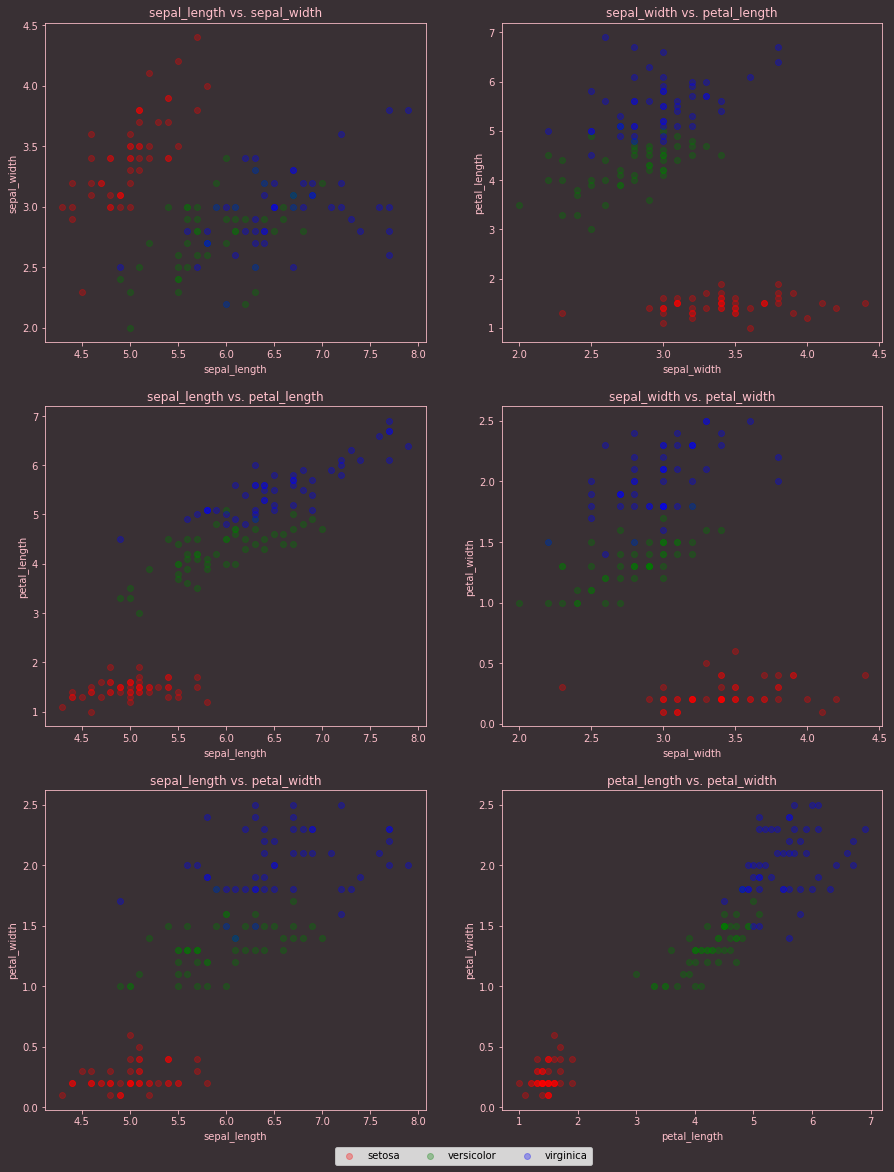

In [7]:
# Create vectors of classes & features
species = np.array(iris_data['species'].unique())
features = np.array(iris_data.drop('species', axis = 1).columns)

# Determine available combinations of features
combo = list(itertools.combinations(features,2))

# Create color dictionary for plotting
colors = {
    'setosa':'red', 
    'versicolor':'green', 
    'virginica':'blue'
    }

# Initialize plotting function
fig, ax = plt.subplots(3,2, figsize = (15,20))

# Iterate through each combination & class
for i in range(len(combo)):
    if i < 3:
        axs = ax[i,0]
    else:
        axs = ax[i-3,1]
    for specie in species:
        temp_data = iris_data[iris_data['species'] == specie].copy(deep=True)
        axs.scatter(temp_data[combo[i][0]], temp_data[combo[i][1]], 
        label = str(specie), c = colors[specie], alpha = 0.3) 
    axs.set_xlabel(combo[i][0]).set_color('pink')
    axs.set_ylabel(combo[i][1]).set_color('pink')
    axs.set_title(str(combo[i][0]) + ' vs. ' + str(combo[i][1])).set_color('pink')
    axs.spines['top'].set_color('pink')
    axs.spines['bottom'].set_color('pink')
    axs.spines['left'].set_color('pink')
    axs.spines['right'].set_color('pink')
    axs.tick_params(axis= 'both', colors = 'pink')
    axs.set_facecolor("#393034")
    fig.patch.set_facecolor("#393034")
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=5)
plt.show()


It may, of course, also be helpful to visualize each of the features alone, with the same intent. 

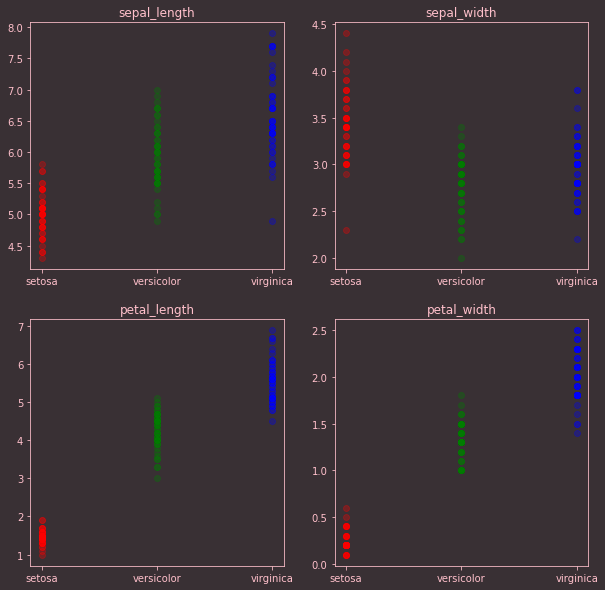

In [12]:
# Define dictionary of colors
colors = {
    'setosa':'red', 
    'versicolor':'green', 
    'virginica':'blue'
    }

# Initialize subplots
fig, ax = plt.subplots(2,2, figsize = (10,10))

# Iterate through the features and then through the classes
for i in range(len(features)):
    if i < 2:
        axs = ax[0,i]
    else:
        axs = ax[1,i-2]
    for specie in species:
        axs.scatter(
            iris_data[iris_data['species'] == specie]['species'],
            iris_data[iris_data['species']== specie][features[i]],
            color = colors[specie], alpha = 0.3)
        axs.set_title(features[i]).set_color('pink')
        axs.spines['top'].set_color('pink')
        axs.spines['bottom'].set_color('pink')
        axs.spines['left'].set_color('pink')
        axs.spines['right'].set_color('pink')
        axs.tick_params(axis= 'both', colors = 'pink')
        axs.set_facecolor("#393034")
        fig.patch.set_facecolor("#393034")

## Z-Scoring

Now that we've got an initial understanding of the data in our set, we can begin to perform some really mild kind of processing. 
Among the simplest forms of data processing is the simple practice of Z-Scoring. Though most would be familiar with it, and though there of course exists many built-ins designed to z-score data and identify outliers, we're going to define a function to perform the z-scoring ourselves, for a given data series. 

Z-scoring is a really simple procedure, and follows the following formula:

$Z_i = \frac{X_i - \mu}{\sigma}$

In [9]:
def z_score_outlier_identifier(data, feature, specie, n_std):
    
    # Load Data
    tt_x = data[data['species'] == specie][feature].reset_index(drop=True)
    
    # Compute Mean and Standard Dev.
    mu_ = tt_x.mean()
    std_ = tt_x.std()

    # Compute Z score for each obs.
    z_ = (tt_x - mu_) / (std_)
    
    # Initialize Output
    outlier_idx = []

    # Loop through z-scores and extract outliers
    for i in range(len(z_)):
        if np.sqrt(z_[i]**2) > n_std:
            outlier_idx += [[i, z_[i]]]

    return outlier_idx

Now, let's try and see where our outliers are in our two kinds of visualization, beginning with the single-feature charts. 

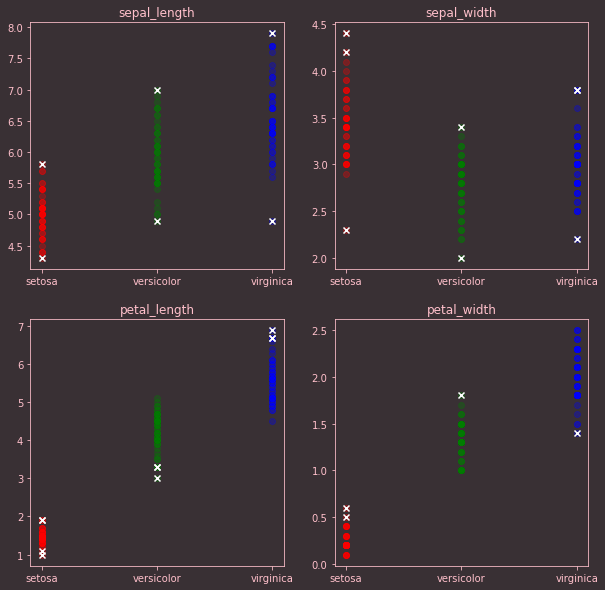

In [13]:
# Define dictionary of colors
colors = {
    'setosa':'red', 
    'versicolor':'green', 
    'virginica':'blue'
    }

# Initialize subplots
fig, ax = plt.subplots(2,2, figsize = (10,10))

# Iterate through the features and then through the classes
for i in range(len(features)):
    for specie in species:
        if i < 2:
            axs = ax[0,i]
        else:
            axs = ax[1,i-2]
        # Compute z-Scores
        z_temp = np.array(z_score_outlier_identifier(
            iris_data,features[i],specie,2))[:,0]
        
        # Plot Data
        axs.scatter(
            iris_data[iris_data['species'] == specie]['species'],
            iris_data[iris_data['species']== specie][features[i]],
            color = colors[specie], alpha = 0.3)

        # Plot Outliers
        axs.scatter(iris_data[iris_data['species'] == specie]['species'].iloc[z_temp],
            iris_data[iris_data['species']== specie][features[i]].iloc[z_temp],
            color = 'white', marker = 'x')

        # Set Title
        axs.set_title(features[i]).set_color('pink')
        axs.spines['top'].set_color('pink')
        axs.spines['bottom'].set_color('pink')
        axs.spines['left'].set_color('pink')
        axs.spines['right'].set_color('pink')
        axs.tick_params(axis= 'both', colors = 'pink')
        axs.set_facecolor("#393034")
        fig.patch.set_facecolor("#393034")

And now let's have a look at our Z-Scored Outliers are in our feature combination visualizations.  

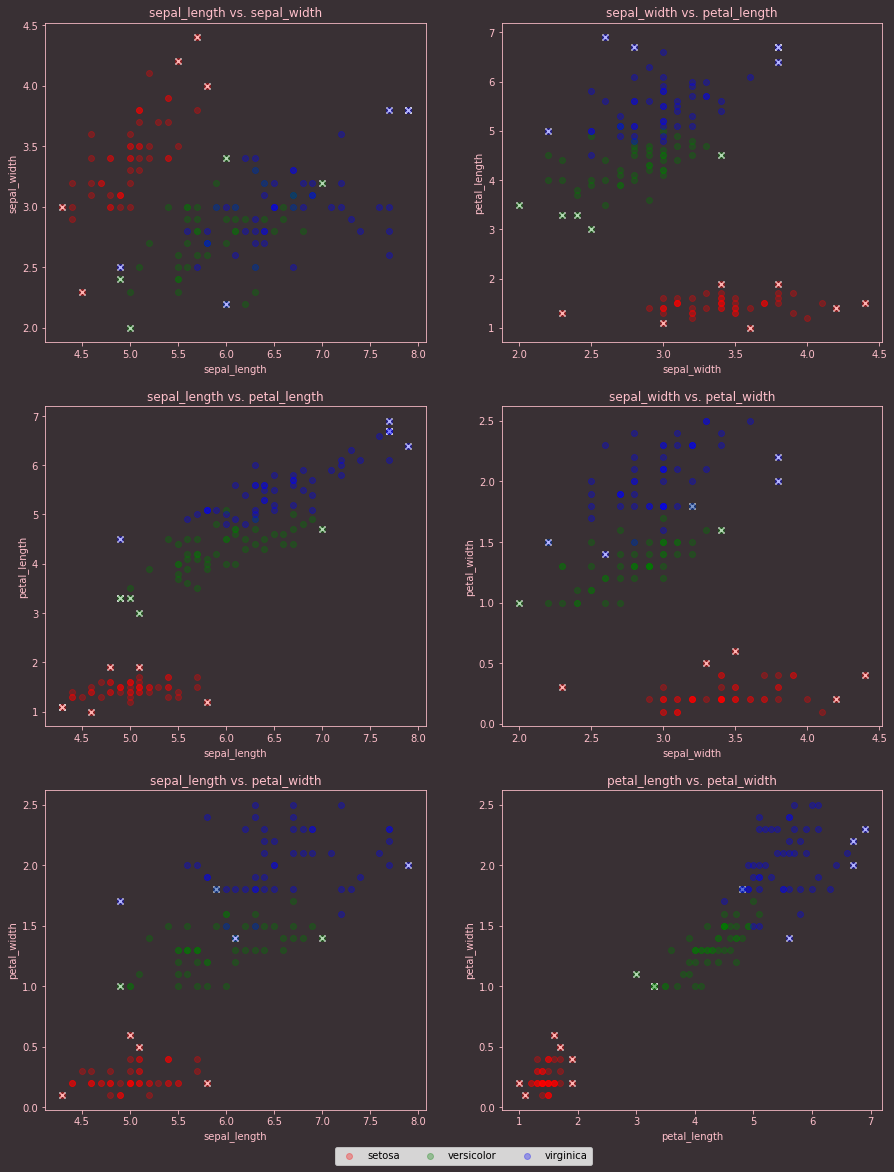

In [11]:
# Initialize plotting function
fig, ax = plt.subplots(3,2, figsize = (15,20))

# Iterate through each combination & class
for i in range(len(combo)):
    if i < 3:
        axs = ax[i,0]
    else:
        axs = ax[i-3,1]

    for specie in species:

        # Extract Data
        temp_data = iris_data[iris_data['species'] == specie].copy(deep=True)

        # Compute z-Score-outliers and plot them
        z_1 = np.array(z_score_outlier_identifier(iris_data,combo[i][0],specie,2))[:,0]
        z_2 = np.array(z_score_outlier_identifier(iris_data,combo[i][1],specie,2))[:,0]
        axs.scatter(temp_data[combo[i][0]].iloc[z_1],
                        temp_data[combo[i][1]].iloc[z_1], 
                        color = 'white', marker = 'x')

        # Plot the data
        axs.scatter(temp_data[combo[i][0]].iloc[z_2],
                        temp_data[combo[i][1]].iloc[z_2], 
                        color = 'white', marker = 'x')
        axs.scatter(temp_data[combo[i][0]], 
                        temp_data[combo[i][1]], 
                        label = str(specie), c = colors[specie], alpha = 0.3) 
    
    # Format the charts
    axs.set_xlabel(combo[i][0]).set_color("pink")
    axs.set_ylabel(combo[i][1]).set_color("pink")
    axs.set_title(str(combo[i][0]) + ' vs. ' + str(combo[i][1])).set_color("pink")
    axs.spines['top'].set_color('pink')
    axs.spines['bottom'].set_color('pink')
    axs.spines['left'].set_color('pink')
    axs.spines['right'].set_color('pink')
    axs.tick_params(axis= 'both', colors = 'pink')
    axs.set_facecolor("#393034")
    fig.patch.set_facecolor("#393034")
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=5)
plt.show()